In [1]:
from skimage.io import imread
from skimage import img_as_float
import numpy as np
from skimage.measure.simple_metrics import compare_psnr
import pylab

image = np.array(imread('parrots.jpg'))
image_shape = image.shape
# image.shape, image

In [2]:
image = img_as_float(image)
image = image.reshape(image.shape[0]*image.shape[1], 3)
# image.shape, image

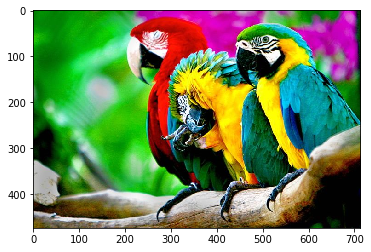

In [3]:
pylab.imshow(image.reshape(image_shape[0],image_shape[1],3))

In [4]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=11, init='k-means++', random_state=241).fit(image)

In [5]:
result_of_clustering = {}
for cluster in np.unique(clf.labels_):
    result_of_clustering[cluster] = {'ids':[], 'vals':[]}  

for i in range(image.shape[0]):
    result_of_clustering[clf.labels_[i]]['ids'].append(i) 
    result_of_clustering[clf.labels_[i]]['vals'].append(image[i,:])
    
for cluster in result_of_clustering:
    result_of_clustering[cluster]['vals'] = np.array(result_of_clustering[cluster]['vals'])
    result_of_clustering[cluster]['mean'] = np.mean(result_of_clustering[cluster]['vals'],axis=0)
    result_of_clustering[cluster]['median'] = np.median(result_of_clustering[cluster]['vals'],axis=0)

In [6]:
mean_image = image.copy()
median_image = image.copy()
for cluster in result_of_clustering:
    for index  in result_of_clustering[cluster]['ids']:
        mean_image[index,:] = result_of_clustering[cluster]['mean']
        median_image[index,:] = result_of_clustering[cluster]['median']
        
image = image.reshape(image_shape[0],image_shape[1],3)
mean_image = mean_image.reshape(image_shape[0],image_shape[1],3)
median_image = median_image.reshape(image_shape[0],image_shape[1],3)

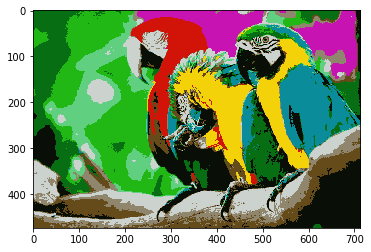

In [7]:
pylab.imshow(mean_image)

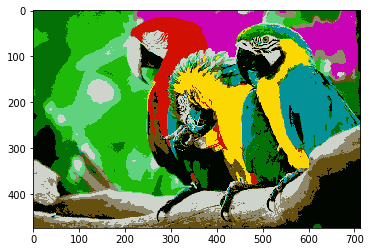

In [8]:
pylab.imshow(median_image)

In [9]:
compare_psnr(image, mean_image), compare_psnr(image, median_image)

(20.163784258757737, 19.88591903608144)